# Logistic Regression | 스팸 메일 분류

## Import data

In [ ]:
data = pd.read_csv('spamdata.csv')
data.head(5)

,Unnamed: 0,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## data pre-processing

In [ ]:
# Unnamed 2,3,4는 필요없으니 삭제하겠습니다.
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

In [ ]:
# v1 데이터는 target variable이지만 숫자가 아니므로 0,1로 변환하겠습니다.
data['v1'] = data['v1'].replace(['ham', 'spam'],[0,1])
X = data['v2']
y = data['v1']

y.value_counts()

0    4825
1     747
Name: v1, dtype: int64

In [ ]:
#데이터 행렬에 숫자대신 단어들이 들어가 있으므로 이를 아래와 같이 빈도수로 표현된 행렬로 변환하겠습니다.

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(data['v2'])
Xdf= vect.transform(data['v2'])

In [ ]:
vect.vocabulary_

{'go': 3550,
 'until': 8030,
 'jurong': 4350,
 'point': 5920,
 'crazy': 2327,
 'available': 1303,
 'only': 5537,
 'in': 4087,
 'bugis': 1751,
 'great': 3634,
 'world': 8489,
 'la': 4476,
 'buffet': 1749,
 'cine': 2048,
 'there': 7645,
 'got': 3594,
 'amore': 1069,
 'wat': 8267,
 'ok': 5504,
 'lar': 4512,
 'joking': 4318,
 'wif': 8392,
 'oni': 5533,
 'free': 3358,
 'entry': 2949,
 'wkly': 8447,
 'comp': 2165,
 'to': 7756,
 'win': 8405,
 'fa': 3087,
 'cup': 2386,
 'final': 3207,
 'tkts': 7743,
 '21st': 411,
 'may': 4930,
 '2005': 402,
 'text': 7595,
 '87121': 784,
 'receive': 6297,
 'question': 6190,
 'std': 7230,
 'txt': 7933,
 'rate': 6242,
 'apply': 1156,
 '08452810075over18': 77,
 'dun': 2802,
 'say': 6633,
 'so': 7024,
 'early': 2823,
 'hor': 3927,
 'already': 1042,
 'then': 7640,
 'nah': 5238,
 'don': 2712,
 'think': 7660,
 'he': 3781,
 'goes': 3558,
 'usf': 8075,
 'lives': 4665,
 'around': 1207,
 'here': 3831,
 'though': 7680,
 'freemsg': 3365,
 'hey': 3841,
 'darling': 2443,
 'it

In [ ]:
Xdf.shape

(5572, 8672)

> wordcloud

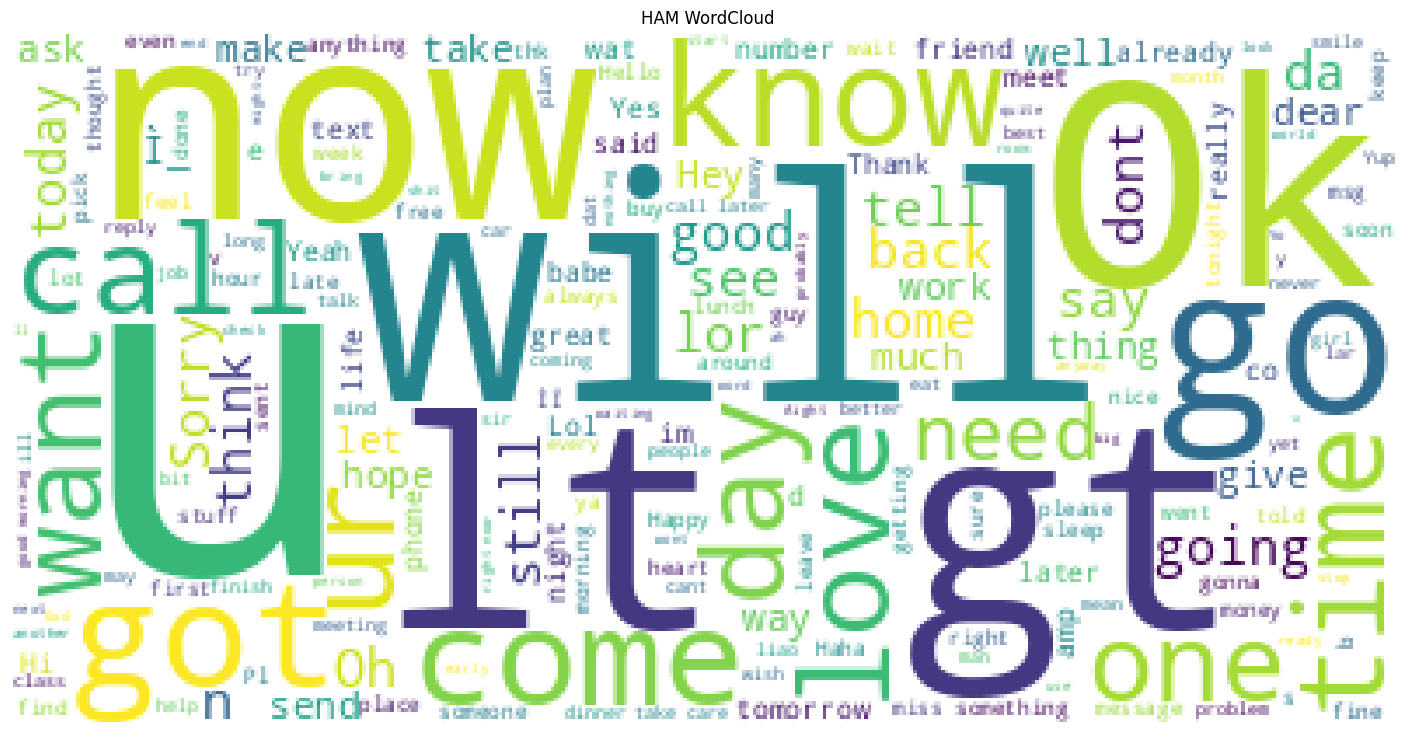

In [ ]:
#재미삼아 워드 클라우드도 그려보겠습니다. 일반 메세지입니다.

from wordcloud import WordCloud
wc = WordCloud(background_color='white',
              max_words=200)

wc.generate(' '.join(word for word in data.loc[data['v1'] == 0 , 'v2']))
plt.figure(figsize=(18,10))
plt.imshow(wc)
plt.title('HAM WordCloud')
plt.axis('off')

plt.show()

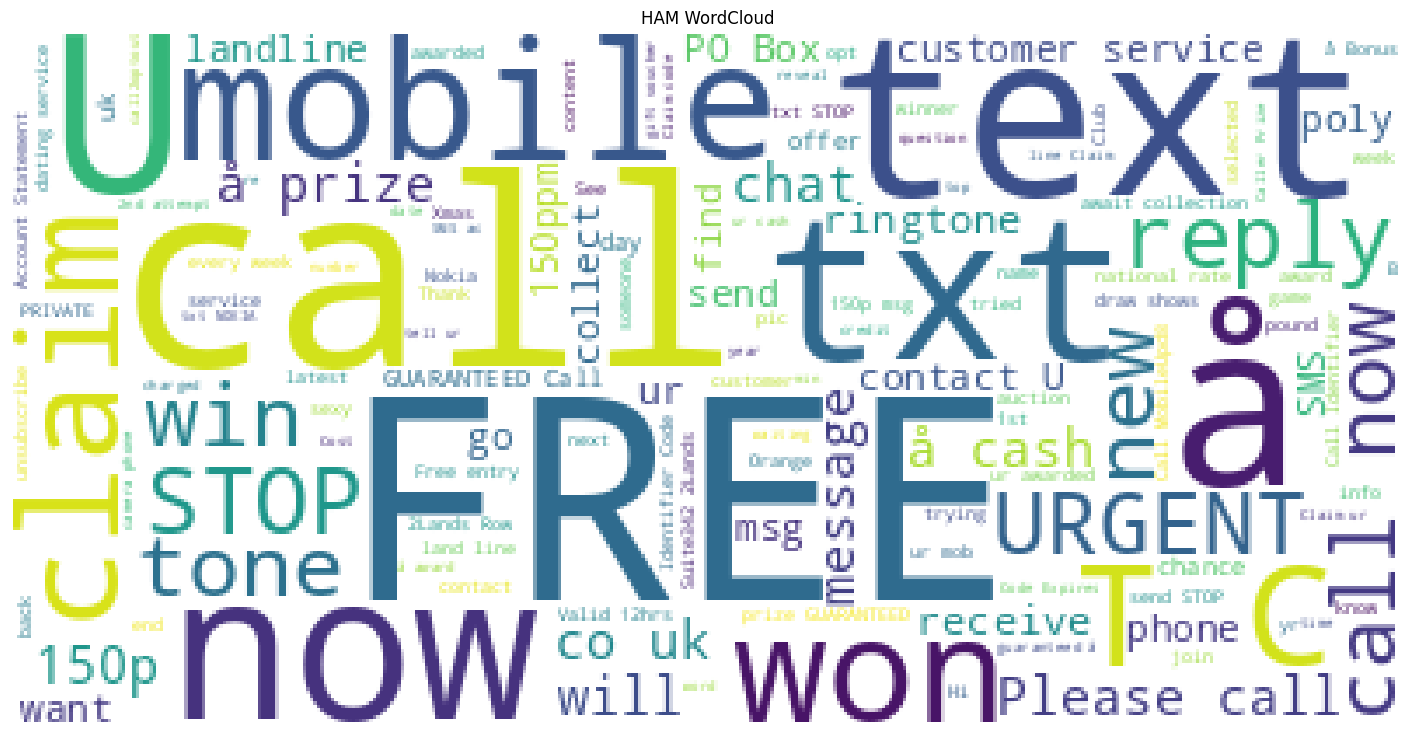

In [ ]:
# 이번에는 스팸 메세지입니다.

from wordcloud import WordCloud
wc = WordCloud(background_color='white',
              max_words=200)

wc.generate(' '.join(word for word in data.loc[data['v1'] == 1 , 'v2']))
plt.figure(figsize=(18,10))
plt.imshow(wc)
plt.title('HAM WordCloud')
plt.axis('off')

plt.show()

각 클래스에 해당되는 데이터 수의 불균형이 심각합니다. 이를 해결하기 위해 일부 샘플만 이용하여 균형을 맞추도록 하겠습니다. (불균형인 채로 학습해 보시면 비교가 되실겁니다. 적은 수의 클래스 데이터를 큰 데이터에 맞추어 oversampling하거나 작은 샘플에 weight를 더 추가할 수 있습니다. oversampling은 imblearn.oversampling을 참조하시고, weight 추가는 sklearn의 logistic regression의 파라메터를 참조하시기 바랍니다.)

> undersampling

In [ ]:
from imblearn.under_sampling import *

X_samp, y_samp = RandomUnderSampler(random_state=0).fit_resample(Xdf, y)
y_samp.value_counts()

0    747
1    747
Name: v1, dtype: int64

## predict

In [ ]:
# 여기서부터는 학생분들이 직접 작성하시면 됩니다.
# 데이터는 위 X_samp 와 y_samp를 이용합니다.

# 1. train test dataset을 적절히 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp, test_size=0.2, random_state=0)

# 2. Logistic Regression 모델을 이용하여 train set으로 학습한다.
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

# 3. test dataset을 활용하여 예측을한다.
y_pred = lr.predict(X_test)

# 4. 각종 평가 지표로 결과가 잘 나왔는지 확인한다.
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUROC: {roc_auc}")

Precision: 0.9716312056737588
Recall: 0.9256756756756757
F1 Score: 0.9480968858131488
AUROC: 0.9811616252013603
